# Project Part 4: Sentiment Analysis


In [2]:
import os
os.chdir('C:\\Users\\wmj51\\Desktop\\python')
import pandas as pd
import numpy as np

from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Split Data Into Training and Testing Sets

In [171]:
df = pd.read_csv('train_NLTKCorpus_Twitter_clean.csv', encoding = "ISO-8859-1")
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)
df.columns = ['target','text']
df['target'] = df['target'].map({0.0:0, 1.0:1})
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['target'].value_counts()

0.0    4966
1.0    4956
Name: target, dtype: int64

In [172]:
x = df.text
y = df.target

from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.02, random_state=SEED)

print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 9723 entries with 50.10% negative, 49.90% positive
Test set has total 199 entries with 47.74% negative, 52.26% positive


### Count Vectorizer

Comparing various machine learning algorithms. As can be seen from the above training set class division, the majority class is negative with 50.10%, which means if a classifer predicts negative for every training data, it will get 50.10% accuracy. 

Convert text into numerical representaiton (countVectorizer & TfidfVectorizer) and test with unigram, bigram, and trigram seperately with or without stopwords. 

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

### Unigram

In [174]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 76.38%
model is 24.12% more accurate than null accuracy
train and test time: 0.54s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 75.88%
model is 23.62% more accurate than null accuracy
train and test time: 0.36s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 75.88%
model is 23.62% more accurate than null accuracy
train and test time: 0.41s
----------------------------------------------------------------------------

In [175]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ugw = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 79.90%
model is 27.64% more accurate than null accuracy
train and test time: 0.63s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 79.40%
model is 27.14% more accurate than null accuracy
train and test time: 0.54s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 79.40%
model is 27.14% more accurate than null accuracy
train and test time: 0.53s
-------------------------------------------------------------------------------

### Bigram

In [176]:
%%time
print ("RESULT FOR BIGRAM WITHOUT STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2), stop_words='english')

RESULT FOR BIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 76.38%
model is 24.12% more accurate than null accuracy
train and test time: 0.82s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 77.39%
model is 25.13% more accurate than null accuracy
train and test time: 0.88s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 75.88%
model is 23.62% more accurate than null accuracy
train and test time: 0.80s
-----------------------------------------------------------------------------

In [177]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS\n"
feature_result_bgw = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 78.89%
model is 26.63% more accurate than null accuracy
train and test time: 1.25s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 77.89%
model is 25.63% more accurate than null accuracy
train and test time: 1.50s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 77.39%
model is 25.13% more accurate than null accuracy
train and test time: 1.23s
--------------------------------------------------------------------------------

### Trigram

In [180]:
%%time
print ("RESULT FOR TRIGRAM WITHOUT STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3), stop_words='english')

RESULT FOR TRIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 76.88%
model is 24.62% more accurate than null accuracy
train and test time: 1.04s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 77.89%
model is 25.63% more accurate than null accuracy
train and test time: 1.25s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 77.39%
model is 25.13% more accurate than null accuracy
train and test time: 1.14s
----------------------------------------------------------------------------

In [181]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tgw = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 78.89%
model is 26.63% more accurate than null accuracy
train and test time: 2.03s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 78.89%
model is 26.63% more accurate than null accuracy
train and test time: 1.80s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 78.39%
model is 26.13% more accurate than null accuracy
train and test time: 2.11s
-------------------------------------------------------------------------------

By looking at the evaluation result, removing stopwords did not improve the model performance and the best testing set accuracy  for each n-gram is as follows: 

- unigram: 10,000 features at test accuracy 79.90%
- bigram: 10,000 features at test accuracy 78.89%
- trigram: 50,000 features at test accuracy 79.40%

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text xticklabel objects>)

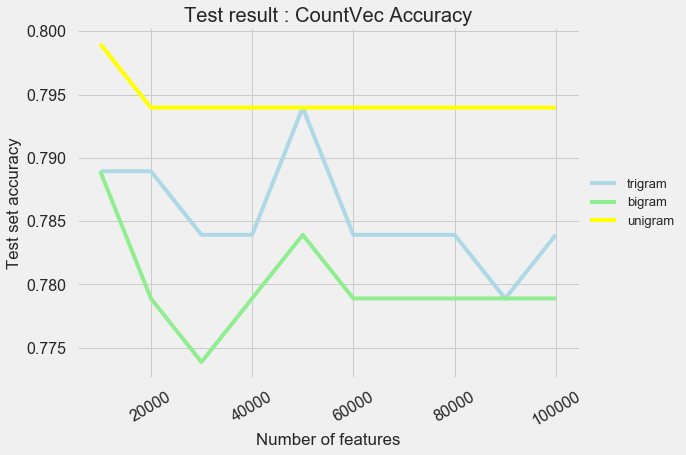

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')

nfeatures_plot_tg = pd.DataFrame(feature_result_tgw,columns=['nfeatures','test_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bgw,columns=['nfeatures','test_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ugw,columns=['nfeatures','test_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.test_accuracy,label='trigram', color = 'lightblue')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.test_accuracy,label='bigram', color = 'lightgreen')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.test_accuracy, label='unigram', color = 'yellow')
plt.title("Test result : CountVec Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':13})
plt.xticks(rotation = 30)

### TFIDF Vectorizer

Another way to convert text to a numerical representaiton and test with unigram, bigram, and trigram seperately with stopwords.

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

print "RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 76.88%
model is 24.62% more accurate than null accuracy
train and test time: 0.40s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 76.88%
model is 24.62% more accurate than null accuracy
train and test time: 0.41s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 76.88%
model is 24.62% more accurate than null accuracy
train and test time: 0.47s
-----------------------------------------------------------------------

In [184]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 76.88%
model is 24.62% more accurate than null accuracy
train and test time: 0.93s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 77.39%
model is 25.13% more accurate than null accuracy
train and test time: 1.12s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 75.38%
model is 23.12% more accurate than null accuracy
train and test time: 1.02s
------------------------------------------------------------------------

In [185]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Test result for 10000 features
null accuracy: 52.26%
accuracy score: 75.88%
model is 23.62% more accurate than null accuracy
train and test time: 1.68s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 52.26%
accuracy score: 77.89%
model is 25.63% more accurate than null accuracy
train and test time: 1.48s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 52.26%
accuracy score: 78.39%
model is 26.13% more accurate than null accuracy
train and test time: 1.49s
-----------------------------------------------------------------------

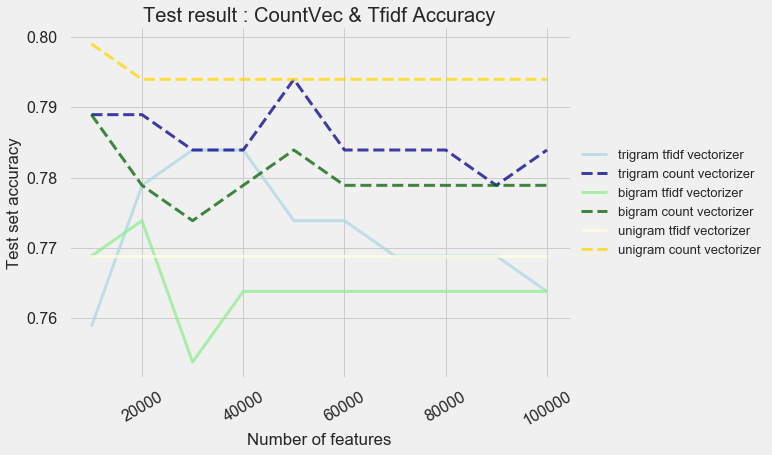

In [287]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','test_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','test_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','test_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.test_accuracy,'k',label='trigram tfidf vectorizer', color='lightblue',linewidth=3,alpha=0.75)
plt.plot(nfeatures_plot_tgw.nfeatures, nfeatures_plot_tg.test_accuracy,'k--', label='trigram count vectorizer', color='darkblue',linewidth=3,alpha=0.75)
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.test_accuracy,'k',label='bigram tfidf vectorizer', color='lightgreen',linewidth=3,alpha=0.75)
plt.plot(nfeatures_plot_bgw.nfeatures, nfeatures_plot_bg.test_accuracy,'k--', label='bigram count vectorizer', color='darkgreen',linewidth=3,alpha=0.75)
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.test_accuracy,'k', label='unigram tfidf vectorizer', color='lightyellow',linewidth=3,alpha=0.75)
plt.plot(nfeatures_plot_ugw.nfeatures, nfeatures_plot_ug.test_accuracy,'k--', label='unigram count vectorizer', color='gold',linewidth=3,alpha=0.75)
plt.title("Test result : CountVec & Tfidf Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.xticks(rotation = 30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':13})

### Algorithms Comparision

The best result with logistic regression was using by countVectorizer of 10,000 features with unigram. Bulding a func with various models and compare their test results. 

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

cvec = CountVectorizer()
def classifier_comparator(vectorizer=cvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Test result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

In [188]:
%%time
unigram_result = classifier_comparator(n_features=10000,ngram_range=(1,1))

Test result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 52.26%
accuracy score: 79.90%
model is 27.64% more accurate than null accuracy
train and test time: 0.57s
--------------------------------------------------------------------------------
Test result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 52.26%
accuracy score: 77.89%
model is 25.63% more accurate than null accuracy
train and test time: 1.38s
--------------------------------------------------------------------------------
Test result for LinearSVC with L1-based feature selec

## vaderSentiment

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains. Vader implements with the grammatical and syntactical rules described in paper (Gilbert, 2014), incorporating empirically derived quantifications for the impact of each rule on the perceived intensity of sentiment in sentence-level text. 

Vader goes beyond what would normally be captured in a typical bag-of-words model, incorporating word-order sensitive relationships between terms (e.g., intensifers, booster words, or degree adverbs): 

- "The service here is extremely good" (positive sentiment intensity = 0.36)
- "The service here is good" (positive sentiment intensity = 0.293)
- "The service here is marginally good" (positive sentiment intensity = 0.227)

Vader implements includes proper handling of sentences with:

- typical negations (e.g., "not good")
- use of contractions as negations (e.g., "wasn't very good")
- conventional use of punctuation to signal increased sentiment intensity (e.g., "Good!!!")
- conventional use of word-shape to signal emphasis (e.g., using ALL CAPS for words/phrases)
- using degree modifiers to alter sentiment intensity (e.g., intensity boosters such as "very" and intensity dampeners such as "kind of")
- understanding many sentiment-laden slang words (e.g., 'sux')
- understanding many sentiment-laden slang words as modifiers such as 'uber' or 'friggin' or 'kinda'
- understanding many sentiment-laden emoticons such as :) and :D
- translating utf-8 encoded emojis such as 💘 and 💋 and 😁
- understanding sentiment-laden initialisms and acronyms (for example: 'lol')

### vaderSentiment with NLTKCorpus_Twitter dataset

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). Setting thresholds for classifying sentences as either positive, neutral, or negative, the results can be found as below:

- Compound range from (-0.15, 0.15) | neu >= 0.55 Accuracy Score : 89.67%
- Compound range from (-0.25, 0.25) | neu >= 0.55 Accuracy Score : 90.96%
- Compound range from (-0.35, 0.35) | neu >= 0.55 Accuracy Score : 92.30%

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df = pd.read_csv('train_NLTKCorpus_Twitter_clean.csv')
df.dropna(inplace=True)
vader = df['clean_text'].apply(lambda x : analyzer.polarity_scores(x))
df=pd.concat([df,vader.apply(pd.Series)],1)
df.to_csv('Train_NLTKCorpus_Twitter_Vader.csv')

In [289]:
from __future__ import division

df = pd.read_csv('Train_NLTKCorpus_Twitter_Vader.csv')
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])
df.head()

,target,clean_text,neg,neu,pos,compound
0,1.0,#FollowFriday for being top engaged members in my community this week :),0.000,0.545,0.455,0.7579
1,1.0,Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!,0.149,0.572,0.279,0.6229
2,1.0,we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!,0.000,0.693,0.307,0.7959
3,1.0,CONGRATS :),0.000,0.000,1.000,0.7983
4,1.0,yeaah yippy!! my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days,0.000,0.726,0.274,0.7772


In [290]:
df['com'] = df['compound']

df = df.drop(df[(df['compound'] >= -0.35) & (df['compound'] <= 0.35)].index)
df.loc[df['compound'] > 0.35, 'compound'] = 1
df.loc[df['compound'] < -0.35, 'compound'] = 0
df = df.drop(df[df['neu'] >=0.55].index)
df['cheating0.35'] = np.where(df['target'] != df['compound'], 'yes', 'no')

In [293]:
print "Compound range from (-0.35, 0.35) | neu >= 0.55 Accuracy Score : {0:.2f}%".format((1 - (len(df.loc[df['cheating0.35'] == 'yes']) / len(df)))*100)
df.loc[df['cheating0.35'] == 'yes']

Compound range from (-0.05, 0.05) | neu >= 0.55 Accuracy Score : 92.30%


,target,clean_text,neg,neu,pos,compound,com,cheating0.35
190,1.0,The question is flawed. Pain doesn't negate strength :),0.584,0.416,0.000,0.0,-0.8130,yes
281,1.0,My legs hurt so bad :)),0.664,0.336,0.000,0.0,-0.8356,yes
388,1.0,no prob!:),0.714,0.286,0.000,0.0,-0.3595,yes
392,1.0,\r\r\r\nWe are not true Pakistanis :p,0.504,0.496,0.000,0.0,-0.4717,yes
459,1.0,Well received but not necessary. :),0.367,0.456,0.177,0.0,-0.3960,yes
460,1.0,long time no see :/ where have you been ? :p,0.338,0.515,0.147,0.0,-0.3818,yes
543,1.0,come kill it for me :),0.402,0.342,0.256,0.0,-0.4019,yes
741,1.0,There is no TRUST without 'us' but there is no UGLY without 'u' :-),0.518,0.376,0.105,0.0,-0.8713,yes
758,1.0,"There's nothing as cool as being totally over someone, No bitterness, anger or hatred towards them. Just pure indifference :)",0.504,0.403,0.093,0.0,-0.9047,yes
774,1.0,"goodbye, don't forget that it was feminists that fought for your right to act like a snobby little bitch :-) goodnight!!",0.310,0.478,0.211,0.0,-0.5998,yes


## LIWC 

The Tone variable puts the two dimensions (positive emotion and negative emotion dimensions) into a single summary variable Cohn, Mehl, & Pennebaker, 2004). The algorithm is built so that the higher the number, the more positive the tone. Numbers below 50 suggest a more negative emotional tone.

- Tone range from (50, 50) | Accuracy Score : 86.32%
- Tone range from (45, 55) | Accuracy Score : 86.32%
- Tone range from (40, 60) | Accuracy Score : 86.32%

Settings a higher thresholds cannot improve accuracy results. 

In [15]:
df = pd.read_csv('Train_NLTKCorpus_Twitter_LIWC.csv')
df.head()

,target,clean_text,Tone,posemo,negemo
0,1.0,#FollowFriday for being top engaged members i...,99.0,16.67,0.0
1,1.0,Hey James! How odd :/ Please call our Contact...,99.0,13.04,0.0
2,1.0,we had a listen last night :) As You Bleed is...,99.0,10.53,0.0
3,1.0,CONGRATS :),99.0,50.00,0.0
4,1.0,yeaah yippy!! my accnt verified rqst has succ...,99.0,9.52,0.0


In [16]:
df = df.drop(df[(df['Tone'] >= 45) & (df['Tone'] <= 55)].index)
df.loc[df['Tone'] > 55, 'Tone'] = 'pos'
df.loc[df['Tone'] < 45, 'Tone'] = 'neg'
df['Tone'] = df['Tone'].map({'pos':1, 'neg':0})

In [17]:
df['Tone'].value_counts()
df['cheating'] = np.where(df['target'] != df['Tone'], 'yes', 'no')

In [13]:
df.loc[df['cheating'] == 'yes']

,target,clean_text,Tone,posemo,negemo,cheating
8,1.0,"Jgh , but we have to go to Bayan :D bye",0,0.00,0.00,yes
9,1.0,"As an act of mischievousness, am calling the E...",0,0.00,0.00,yes
28,1.0,lols. :D,0,0.00,0.00,yes
33,1.0,everyone watch the documentary Earthlings on Y...,0,0.00,0.00,yes
37,1.0,I am looking forward to visiting next week #...,0,0.00,0.00,yes
52,1.0,"Yes, I suppose. I bet he will have a blue fi...",0,0.00,5.88,yes
57,1.0,oley be :D,0,0.00,0.00,yes
76,1.0,finally the fucking weekend :),0,20.00,20.00,yes
80,1.0,YES! I Joined #HushedCallWithFraydoe for a cal...,0,0.00,0.00,yes
94,1.0,waiting for nudes :-),0,0.00,0.00,yes
